#                                      Data Science Intern at LetsGrowMore

###       Task     :      1) IrisFlowers Classification MLProject
###        Level   :      BEGINNER LEVEL TASK
###        Batch  :      August 2k22
###        Author:      Akash Dandge

In [1]:
#import neccesarry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

### Load the data

In [2]:
#Conveting text data into csv
txt_data=pd.read_csv(r"S:\Projects\LGMVIP- DataScience\1.Iris Flowers Classification ML\iris.data",names=['SepalL','SepalW','PetalL','PetalW','Species'])
txt_data.to_csv(r"S:\Projects\LGMVIP- DataScience\1.Iris Flowers Classification ML\Iris.csv",index=0)

#importing dataset
data=pd.read_csv(r"S:\Projects\LGMVIP- DataScience\1.Iris Flowers Classification ML\Iris.csv")
data

,SepalL,SepalW,PetalL,PetalW,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Data Understanding

In [3]:
data.head()

,SepalL,SepalW,PetalL,PetalW,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SepalL,SepalW,PetalL,PetalW,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.columns

Index(['SepalL', 'SepalW', 'PetalL', 'PetalW', 'Species'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SepalL   150 non-null    float64
 1   SepalW   150 non-null    float64
 2   PetalL   150 non-null    float64
 3   PetalW   150 non-null    float64
 4   Species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe(include='all')

,SepalL,SepalW,PetalL,PetalW,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#### Cheacking Null values

In [11]:
data.isnull()

,SepalL,SepalW,PetalL,PetalW,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
data.isnull().sum() #No null values present

SepalL     0
SepalW     0
PetalL     0
PetalW     0
Species    0
dtype: int64

### EDA

In [13]:
data

,SepalL,SepalW,PetalL,PetalW,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
def val():
    x=['SepalL','SepalW','PetalL','PetalW']
    return x

In [15]:
def hist():
    x=val()
    for i in x:
        sns.displot(data[i],kde=True)
        plt.show()

#### Histogram

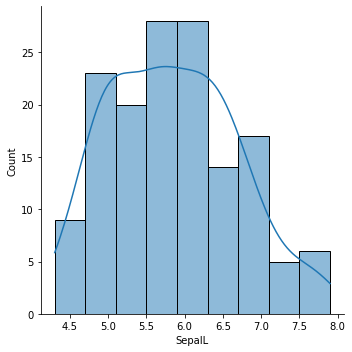

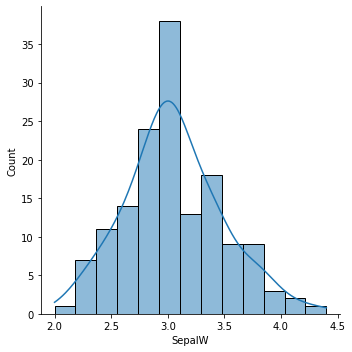

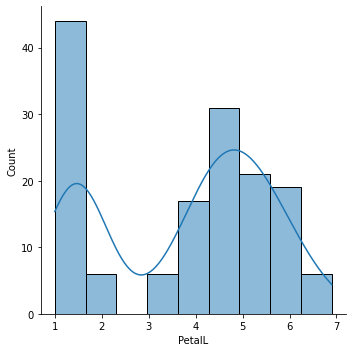

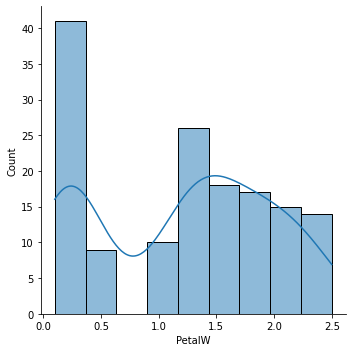

In [16]:
#histogram for following arguments
hist()

#### Boxplot

In [17]:
def box():
    x=val()
    for i in x:
        sns.boxplot(data[i])
        plt.show()

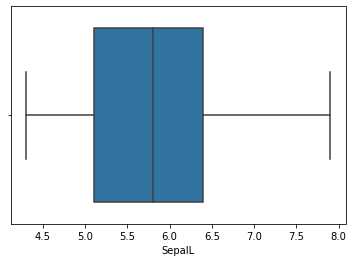

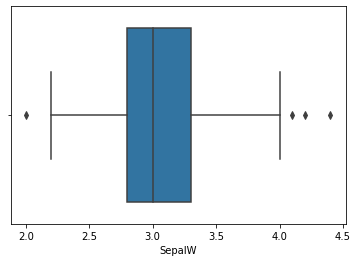

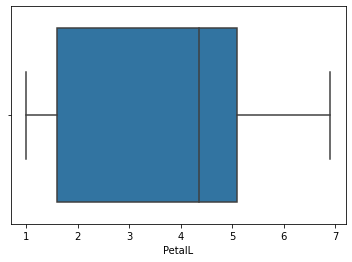

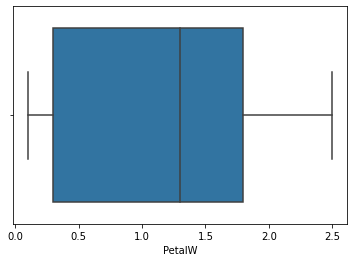

In [18]:
box() #we can check outliers by using this

#### Scatter plot

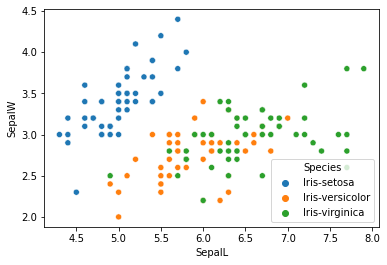

In [19]:
#Scatter plot for sepal
sns.scatterplot(x='SepalL',y='SepalW',data=data,hue='Species')
plt.show()

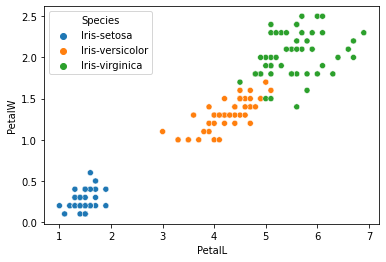

In [20]:
#scatter plot for petal
sns.scatterplot(x='PetalL',y='PetalW',data=data,hue='Species')
plt.show()

#### Pair Plot

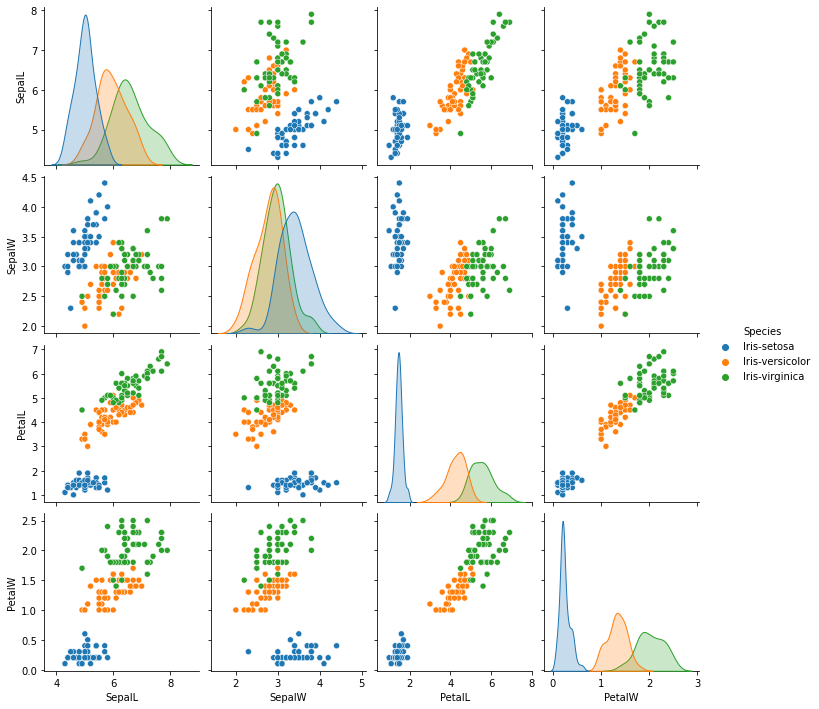

In [21]:
sns.pairplot(data,hue="Species")
plt.show()

#### Join plot

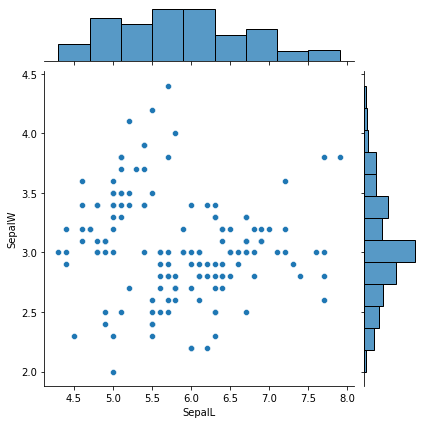

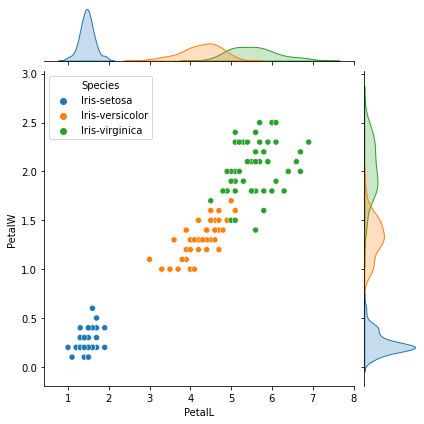

In [22]:
sns.jointplot(x='SepalL',y='SepalW',data=data,) #reprentation of 2D histogram and 2D density plot
sns.jointplot(x='PetalL',y='PetalW',data=data,hue='Species')
plt.show()

#### Facegrid

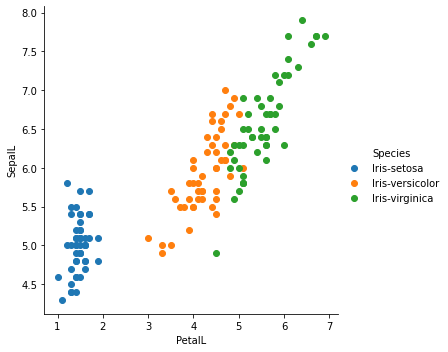

In [23]:
sns.FacetGrid(data,hue='Species',height=5).map(plt.scatter,'PetalL','SepalL').add_legend()
plt.show()

#### Heat Map

          SepalL    SepalW
SepalL  1.000000 -0.109369
SepalW -0.109369  1.000000


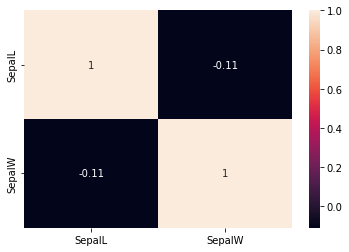

In [24]:
corr_sepal=data[['SepalL','SepalW']].corr() #chacking co-relation
print(corr_sepal)
sns.heatmap(corr_sepal,annot=True)
plt.show()

          PetalL    PetalW
PetalL  1.000000  0.962757
PetalW  0.962757  1.000000


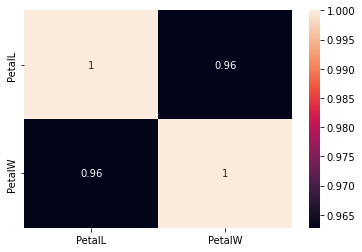

In [25]:
corr_petal=data[['PetalL','PetalW']].corr()
print(corr_petal)
sns.heatmap(corr_petal,annot=True)
plt.show()

### splitting the data into data and labels

In [26]:
X=data.drop('Species',axis=1)
X.head()

,SepalL,SepalW,PetalL,PetalW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y=data['Species']
y.head()    #data is splited in x and y

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
modal=LogisticRegression() 

In [30]:
modal.fit(X,y) #its performing drawing devision line and devide the data in two parts

LogisticRegression()

#### Modal Accuracy

In [31]:
modal.score(X,y)

0.9733333333333334

#### making prediction 

In [32]:
actual=y
predict=modal.predict(X)   #predict

#### classification report

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(actual,predict) #gives insights of prediction

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(actual,predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



#### Making a prediction model

In [36]:
print("Enter Details For Modal Prediction")
sepal_l=float(input("sepal_length : "))
sepal_w=float(input("sepal_width : "))
petal_l=float(input("petal_length : "))
petal_w=float(input("petal_width : "))
data1=np.array([[sepal_l,sepal_w,petal_l,petal_w]])

Enter Details For Modal Prediction
sepal_length : 20
sepal_width : 10
petal_length : 20
petal_width : 10


In [37]:
pre=modal.predict(data1)
if(pre=='Iris-setosa'):
    print("Iris setosa")
elif(pre=="Iris-virginica"):
    print("Iris virginica")
else:
    print("Iris versicolor")

Iris virginica
